In [1]:
import autograd.numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from autograd import elementwise_grad as egrad
from autograd import grad


#code adapted from https://nipunbatra.github.io/blog/ml/2020/03/29/param-learning.html
#and http://krasserm.github.io/2018/03/19/gaussian-processes/

#code is plotted with gaussian process utilities library found at: https://raw.githubusercontent.com/krasserm/bayesian-machine-learning/dev/gaussian-processes/gaussian_processes_util.py

#http://www.gaussianprocess.org/gpml/chapters/RW2.pdf was also used for learning purposed




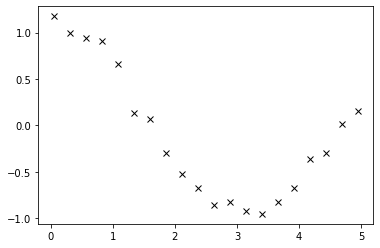

In [2]:
np.random.seed(0)
X = np.linspace(0.05, 4.95, 20)[:, None]
Y = np.cos(X) + np.random.normal(0., 0.1, (20,1)) 
plt.plot(X, Y, "kx")


In [4]:
def radial_basis_function(x1, x2, sigma, l):
    return (sigma**2)*(np.exp(-(x1-x2)**2/(2*(l**2))))  

def negative_log_likelihood(sigma=1, l=1, noise_std=1):
    n = X.shape[0]
    cov = radial_basis_function(X, X.T, sigma, l) + (noise_std**2)*np.eye(X.shape[0])
    nll_ar =  0.5*(Y.T@np.linalg.inv(cov)@Y) + 0.5*n*np.log(2*np.pi) + 0.5*np.log(np.linalg.det(cov)) 
    return nll_ar[0,0]

def gradient_descent(g, alpha, max_its, sigma, l):
    noise = 1.0
    gradient = grad(g, argnum=[0, 1, 2])
    cost_history = np.zeros(max_its)
    for iteration in range(max_its):
        cost_history[iteration] = g(sigma, l, noise)
        del_sigma, del_l, del_noise = gradient(sigma, l, noise)
        sigma = sigma - alpha*del_sigma
        l = l - alpha*del_l
        noise = noise - alpha*del_noise
    return cost_history, l, sigma, noise


Text(0, 0.5, 'NLL')

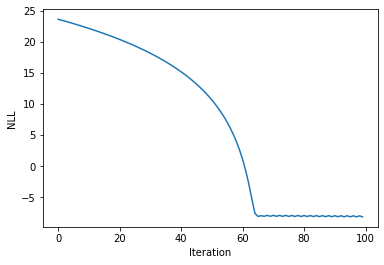

In [5]:
cost_history, l, sigma, noise = gradient_descent(g = negative_log_likelihood, alpha = 0.0005, max_its = 100, sigma = 2.0, l = 2.0)
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("NLL")